In [ ]:
import os
import pandas as pd
from sqlalchemy import create_engine
from dotenv import load_dotenv

# Load environment variables (adjust path if needed)
load_dotenv('../../.env')

POSTGRES_HOST = os.getenv("POSTGRES_HOST", "localhost")
POSTGRES_PORT = os.getenv("POSTGRES_PORT", "5432")
POSTGRES_DB = os.getenv("POSTGRES_DB", "telegram_scraper")
POSTGRES_USER = os.getenv("POSTGRES_USER", "your_username")
POSTGRES_PASSWORD = os.getenv("POSTGRES_PASSWORD")

# Connect to DB
engine = create_engine(
    f"postgresql://{POSTGRES_USER}:{POSTGRES_PASSWORD}@{POSTGRES_HOST}:{POSTGRES_PORT}/{POSTGRES_DB}"
)

# Load the table into a DataFrame
df = pd.read_sql("SELECT * FROM relevant_classified_narrative_results", engine)



desired_order = [
    'country', 'type', 'table', 'chat_id', 'id', 'chat_name', 'peer_id',
    'messagedatetime', 'messagedate', 'messagetext', 'out', 'mentioned',
    'media_unread', 'silent', 'post', 'from_scheduled', 'legacy',
    'edit_hide', 'pinned', 'noforwards', 'invert_media', 'offline',
    'from_id', 'from_boosts_applied', 'saved_peer_id', 'fwd_from',
    'fwd_from_type', 'via_bot_id', 'via_business_bot_id', 'reply_to',
    'reply_markup', 'entities', 'edit_date', 'post_author', 'grouped_id',
    'ttl_period', 'quick_reply_shortcut_id', 'effect', 'factcheck', 'views',
    'forwards', 'replies', 'reactions', 'embedding',
    'denazificationofukraine_similarity',
    'protectionofrussianspeakers_similarity',
    'natoexpansionthreat_similarity', 'biolabsconspiracy_similarity',
    'historicalunity_similarity', 'westernrussophobia_similarity',
    'sanctionsaseconomicwarfare_similarity',
    'legitimizingannexedterritories_similarity',
    'discreditingukraineleadership_similarity', 'putinsdeath_similarity',
    'russiascollapse_similarity', 'nordstreampipelinesabotage_similarity',
    'heroicmyths_similarity', 'optimismstrategy_similarity',
    'notsidingwithukraine_similarity',
    'ukraineagainstnewfascism_similarity', 'cannonfodder_similarity',
    'truthvsrussianlies_similarity'
]

# After loading your DataFrame as df:
df = df.reindex(columns=desired_order)

# Show the first few rows
df.head()

In [5]:
import os
import pandas as pd
from sqlalchemy import create_engine
from dotenv import load_dotenv

# Load environment variables
load_dotenv()

POSTGRES_HOST = os.getenv("POSTGRES_HOST", "localhost")
POSTGRES_PORT = os.getenv("POSTGRES_PORT", "5432")
POSTGRES_DB = os.getenv("POSTGRES_DB", "telegram_scraper")
POSTGRES_USER = os.getenv("POSTGRES_USER", "postgres")
POSTGRES_PASSWORD = os.getenv("POSTGRES_PASSWORD")

# Connect to database
engine = create_engine(f'postgresql://{POSTGRES_USER}:{POSTGRES_PASSWORD}@{POSTGRES_HOST}:{POSTGRES_PORT}/{POSTGRES_DB}')

# Get all narrative similarity columns
narrative_columns = [
    'denazificationofukraine_similarity',
    'protectionofrussianspeakers_similarity',
    'natoexpansionthreat_similarity', 'biolabsconspiracy_similarity',
    'historicalunity_similarity', 'westernrussophobia_similarity',
    'sanctionsaseconomicwarfare_similarity',
    'legitimizingannexedterritories_similarity',
    'discreditingukraineleadership_similarity', 'putinsdeath_similarity',
    'russiascollapse_similarity', 'nordstreampipelinesabotage_similarity',
    'heroicmyths_similarity', 'optimismstrategy_similarity',
    'notsidingwithukraine_similarity',
    'ukraineagainstnewfascism_similarity', 'cannonfodder_similarity',
    'truthvsrussianlies_similarity'
]

# Load data
df = pd.read_sql("SELECT * FROM relevant_classified_narrative_results", engine)

# Create DataFrame with 6 rows and 18 columns
result_data = {}

# Create column names (narrative names)
column_names = [col.replace('_similarity', '').replace('_', ' ').title() for col in narrative_columns]

# Initialize with empty cells
for col in column_names:
    result_data[col] = [''] * 6

# Fill in the data
for i, narrative in enumerate(narrative_columns):
    narrative_name = column_names[i]
    
    # Get top 5 messages for this narrative
    top_5 = df.nlargest(5, narrative)[['id', 'chat_name', 'country', 'messagedatetime', narrative, 'messagetext']]
    
    # Fill in the column
    for j, (_, row) in enumerate(top_5.iterrows(), 1):
        message_text = f"ID: {row['id']} | Chat: {row['chat_name']} | Country: {row['country']} | Date: {str(row['messagedatetime'])[:10]} | Score: {row[narrative]:.3f} | Text: {str(row['messagetext'])}"
        result_data[narrative_name][j] = message_text

# Create DataFrame
result_df = pd.DataFrame(result_data)

# Add row labels
result_df.index = ['Rank', 'Rank 1', 'Rank 2', 'Rank 3', 'Rank 4', 'Rank 5']

# Save to Excel with proper encoding
output_file = 'top_5_messages_per_narrative_table.xlsx'
with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    result_df.to_excel(writer, sheet_name='Top Messages', index=True)

print(f"Results saved to {output_file}")
print(f"Shape: {result_df.shape} (6 rows, 18 columns)")

# Display the table
print("\nTop 5 Messages per Narrative Table:")
print(result_df)

Results saved to top_5_messages_per_narrative_table.xlsx
Shape: (6, 18) (6 rows, 18 columns)

Top 5 Messages per Narrative Table:
                                  Denazificationofukraine  \
Rank                                                        
Rank 1  ID: 7308 | Chat: https://t.me/Russica2 | Count...   
Rank 2  ID: 7308 | Chat: https://t.me/ostorozhno_novos...   
Rank 3  ID: 7308 | Chat: https://t.me/smi_rf_moskva | ...   
Rank 4  ID: 7308 | Chat: https://t.me/moscow | Country...   
Rank 5  ID: 7308 | Chat: https://t.me/wargonzo | Count...   

                              Protectionofrussianspeakers  \
Rank                                                        
Rank 1  ID: 145589 | Chat: https://t.me/treshchat_ulya...   
Rank 2  ID: 145589 | Chat: https://t.me/vorobiev_live_...   
Rank 3  ID: 6798675 | Chat: https://t.me/gulagchat | C...   
Rank 4  ID: 22852522 | Chat: https://t.me/chatzvz | Co...   
Rank 5  ID: 301873 | Chat: https://t.me/tass_agency | ...   

              

In [1]:
import os
import pandas as pd
from sqlalchemy import create_engine
from dotenv import load_dotenv

# Load environment variables (adjust path if needed)
load_dotenv('../../.env')

POSTGRES_HOST = os.getenv("POSTGRES_HOST", "localhost")
POSTGRES_PORT = os.getenv("POSTGRES_PORT", "5432")
POSTGRES_DB = os.getenv("POSTGRES_DB", "telegram_scraper")
POSTGRES_USER = os.getenv("POSTGRES_USER", "your_username")
POSTGRES_PASSWORD = os.getenv("POSTGRES_PASSWORD")

# Connect to DB
engine = create_engine(
    f"postgresql://{POSTGRES_USER}:{POSTGRES_PASSWORD}@{POSTGRES_HOST}:{POSTGRES_PORT}/{POSTGRES_DB}"
)

# Load the table into a DataFrame
df = pd.read_sql("SELECT * FROM gpt_zero_shot_narrative_results", engine)

desired_order = [
    'country', 'type', 'table', 'chat_id', 'id', 'chat_name', 'peer_id',
    'messagedatetime', 'messagedate', 'messagetext', 'out', 'mentioned',
    'media_unread', 'silent', 'post', 'from_scheduled', 'legacy',
    'edit_hide', 'pinned', 'noforwards', 'invert_media', 'offline',
    'from_id', 'from_boosts_applied', 'saved_peer_id', 'fwd_from',
    'fwd_from_type', 'via_bot_id', 'via_business_bot_id', 'reply_to',
    'reply_markup', 'entities', 'edit_date', 'post_author', 'grouped_id',
    'ttl_period', 'quick_reply_shortcut_id', 'effect', 'factcheck', 'views',
    'forwards', 'replies', 'reactions', 'embedding',
    'denazificationofukraine_similarity',
    'protectionofrussianspeakers_similarity',
    'natoexpansionthreat_similarity', 'biolabsconspiracy_similarity',
    'historicalunity_similarity', 'westernrussophobia_similarity',
    'sanctionsaseconomicwarfare_similarity',
    'legitimizingannexedterritories_similarity',
    'discreditingukraineleadership_similarity', 'putinsdeath_similarity',
    'russiascollapse_similarity', 'nordstreampipelinesabotage_similarity',
    'heroicmyths_similarity', 'optimismstrategy_similarity',
    'notsidingwithukraine_similarity',
    'ukraineagainstnewfascism_similarity', 'cannonfodder_similarity',
    'truthvsrussianlies_similarity', 'gpt_match_denazificationofukraine',
    'gpt_match_protectionofrussianspeakers',
    'gpt_match_natoexpansionthreat', 'gpt_match_biolabsconspiracy',
    'gpt_match_historicalunity', 'gpt_match_westernrussophobia',
    'gpt_match_sanctionsaseconomicwarfare',
    'gpt_match_legitimizingannexedterritories',
    'gpt_match_discreditingukraineleadership', 'gpt_match_putinsdeath',
    'gpt_match_russiascollapse', 'gpt_match_nordstreampipelinesabotage',
    'gpt_match_heroicmyths', 'gpt_match_optimismstrategy',
    'gpt_match_notsidingwithukraine', 'gpt_match_ukraineagainstnewfascism',
    'gpt_match_cannonfodder', 'gpt_match_truthvsrussianlies'
]

# After loading your DataFrame as df:
df = df.reindex(columns=desired_order)

df.head()

,country,type,table,chat_id,id,chat_name,peer_id,messagedatetime,messagedate,messagetext,...,gpt_match_discreditingukraineleadership,gpt_match_putinsdeath,gpt_match_russiascollapse,gpt_match_nordstreampipelinesabotage,gpt_match_heroicmyths,gpt_match_optimismstrategy,gpt_match_notsidingwithukraine,gpt_match_ukraineagainstnewfascism,gpt_match_cannonfodder,gpt_match_truthvsrussianlies
0,Russia,channel,russian_channels_messages,1101170442,295881,https://t.me/rian_ru,1101170442,2025-05-27 09:17:29,2025-05-27,Заявления Пескова:\n\n▪️США и Трамп сбалансиро...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Russia,channel,russian_channels_messages,1101170442,295893,https://t.me/rian_ru,1101170442,2025-05-27 10:20:21,2025-05-27,Основные заявления Захаровой на брифинге:\n\n▪...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Russia,channel,russian_channels_messages,1050820672,107674,https://t.me/tass_agency,1050820672,2022-02-12 08:24:49,2022-02-12,Корабли Черноморского флота вышли в море для о...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Russia,channel,russian_channels_messages,1099860397,107674,https://t.me/rbc_news,1099860397,2024-11-23 06:55:09,2024-11-23,Избранного президента США Дональда Трампа не у...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Russia,channel,russian_channels_messages,1166834860,107674,https://t.me/ru2ch,1166834860,2024-03-27 11:19:46,2024-03-27,В России реальную власть женщины получили толь...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# List of gpt_match_ columns (replace with your actual list if needed)
gpt_match_cols = [col for col in df.columns if col.startswith("gpt_match_")]

# Show value counts for each gpt_match_ column
for col in gpt_match_cols:
    print(f"Value counts for {col}:")
    print(df[col].value_counts(dropna=False))
    print("-" * 40)

Value counts for gpt_match_denazificationofukraine:
gpt_match_denazificationofukraine
0.0    412216
1.0       226
Name: count, dtype: int64
----------------------------------------
Value counts for gpt_match_protectionofrussianspeakers:
gpt_match_protectionofrussianspeakers
0.0    412327
1.0       115
Name: count, dtype: int64
----------------------------------------
Value counts for gpt_match_natoexpansionthreat:
gpt_match_natoexpansionthreat
0.0    412365
1.0        77
Name: count, dtype: int64
----------------------------------------
Value counts for gpt_match_biolabsconspiracy:
gpt_match_biolabsconspiracy
0.0    412428
1.0        14
Name: count, dtype: int64
----------------------------------------
Value counts for gpt_match_historicalunity:
gpt_match_historicalunity
0.0    412302
1.0       140
Name: count, dtype: int64
----------------------------------------
Value counts for gpt_match_westernrussophobia:
gpt_match_westernrussophobia
0.0    412324
1.0       118
Name: count, dtype:

In [4]:
df

,country,type,table,chat_id,id,chat_name,peer_id,messagedatetime,messagedate,messagetext,...,gpt_match_discreditingukraineleadership,gpt_match_putinsdeath,gpt_match_russiascollapse,gpt_match_nordstreampipelinesabotage,gpt_match_heroicmyths,gpt_match_optimismstrategy,gpt_match_notsidingwithukraine,gpt_match_ukraineagainstnewfascism,gpt_match_cannonfodder,gpt_match_truthvsrussianlies
0,Russia,channel,russian_channels_messages,1101170442,295881,https://t.me/rian_ru,1101170442,2025-05-27 09:17:29,2025-05-27,Заявления Пескова:\n\n▪️США и Трамп сбалансиро...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Russia,channel,russian_channels_messages,1101170442,295893,https://t.me/rian_ru,1101170442,2025-05-27 10:20:21,2025-05-27,Основные заявления Захаровой на брифинге:\n\n▪...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Russia,channel,russian_channels_messages,1050820672,107674,https://t.me/tass_agency,1050820672,2022-02-12 08:24:49,2022-02-12,Корабли Черноморского флота вышли в море для о...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Russia,channel,russian_channels_messages,1099860397,107674,https://t.me/rbc_news,1099860397,2024-11-23 06:55:09,2024-11-23,Избранного президента США Дональда Трампа не у...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Russia,channel,russian_channels_messages,1166834860,107674,https://t.me/ru2ch,1166834860,2024-03-27 11:19:46,2024-03-27,В России реальную власть женщины получили толь...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412437,Ukraine,group,ukrainian_groups_messages,1535275853,272928,https://t.me/findpeoplenow_group,1535275853,2024-12-31 12:10:48,2024-12-31,📢📢📢📢📢📢📢📢\n‼️‼️‼️‼️‼️‼️‼️‼️‼️\nГорить Петиція 🔥...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
412438,Ukraine,group,ukrainian_groups_messages,1535275853,272952,https://t.me/findpeoplenow_group,1535275853,2024-12-31 14:33:55,2024-12-31,📢📢📢📢📢📢📢📢\n‼️‼️‼️‼️‼️‼️‼️‼️‼️\nГорить Петиція 🔥...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
412439,Ukraine,group,ukrainian_groups_messages,1535275853,273068,https://t.me/findpeoplenow_group,1535275853,2024-12-31 20:59:08,2024-12-31,💫 Мільйони українських сердець сьогодні загаду...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
412440,Ukraine,group,ukrainian_groups_messages,1535275853,273211,https://t.me/findpeoplenow_group,1535275853,2025-01-01 13:38:43,2025-01-01,📢📢📢📢📢📢📢📢\n‼️‼️‼️‼️‼️‼️‼️‼️‼️\nГорить Петиція 🔥...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Identify all gpt_match columns
gpt_cols = [col for col in df.columns if col.startswith('gpt_match_')]

for col in gpt_cols:
    # Derive the corresponding similarity column
    narrative_key = col.replace('gpt_match_', '')
    similarity_col = f"{narrative_key}_similarity"
    print(f"\n=== {col} ===")
    matching_rows = df[df[col] == 1]
    if matching_rows.empty or similarity_col not in df.columns:
        print("No matches or similarity column missing.")
        continue
    for idx, row in matching_rows.iterrows():
        print(f"ID: {row['id']}")
        print(f"Country: {row['country']}, Table: {row['table']}, Chat: {row['chat_name']}")
        print(f"Message: {row['messagetext']}")
        print(f"Similarity score ({similarity_col}): {row[similarity_col]}")
        print("-" * 60)


=== gpt_match_denazificationofukraine ===
ID: 107717
Country: Russia, Table: russian_channels_messages, Chat: https://t.me/rt_russian
Message: Роман Антоновский, писатель, публицист, автор Telegram-канала «Сыны Монархии» @SonOfMonarchy

Приднестровье — уникальный анклав русского мира. На территории ПМР проживают молдаване, русские, украинцы и болгары. Молдавский и украинский являются официальными государственными языками республики наряду с русским.

Тем не менее всё население ПМР говорит в быту на русском и пронизано русским патриотизмом.

Все они ощущают себя частью Большой России, являясь её патриотами больше, чем те россияне, которым сегодня стыдно, что они русские.

В 2014 году приднестровцы мечтали, чтобы Россия пошла дальше Крыма и всё побережье Южной Украины вместе с ПМР было включено в состав РФ.

Надеюсь, эта мечта сбудется в недалёком будущем.

Однако сегодня над Приднестровьем нависла нешуточная террористическая угроза. Украинские ДРГ вчера совершили три теракта на террито

In [ ]:
# !pip install tiktoken

import tiktoken
import pandas as pd
import re

# --- Helper to sanitize narrative keys for column names ---
def sanitize_key(key):
    sanitized = re.sub(r'[ \-/]', '_', key)
    sanitized = re.sub(r'[^A-Za-z0-9_]', '', sanitized)
    return sanitized

# --- Load narratives from Excel (same logic as your script) ---
def load_narratives_from_excel(file_path):
    xls = pd.ExcelFile(file_path)
    narratives = {}
    for sheet_name in xls.sheet_names:
        df_sheet = pd.read_excel(xls, sheet_name)
        narratives[sheet_name] = dict(zip(df_sheet['NarrativeName'], df_sheet['NarrativeOriginalLanguage']))
    return narratives

NARRATIVES_FILE_PATH = '../../data/propaganda_narratives/propagandaNarratives.xlsx'
narratives = load_narratives_from_excel(NARRATIVES_FILE_PATH)

# --- Token cost calculation for all narratives ---
enc = tiktoken.encoding_for_model("gpt-4o")
input_price = 0.40  # $ per 1M tokens (GPT-4o mini input)

country_to_sheet = {"Russia": "RussianNarratives", "Ukraine": "UkrainianNarratives"}
results = []

def build_prompt(message, narrative):
    return (
        f"Does the following message express or support the narrative below? "
        f"Reply only with 'yes' or 'no'.\n\n"
        f"Message: {message}\n\n"
        f"Narrative: {narrative}"
    )

for country, sheet in country_to_sheet.items():
    print(f"Processing {country} {sheet}")
    for narrative_key, narrative_text in narratives.get(sheet, {}).items():
        print(f"Processing {narrative_key} {narrative_text}")
        similarity_col = f"{narrative_key}_similarity".lower()
        if similarity_col not in df.columns:
            continue
        rows = df[(df['country'] == country) & (df[similarity_col] > 0.85)]
        print(f"Processing {len(rows)} messages for {narrative_key} in {country}")
        total_input_tokens = 0
        for msg in rows['messagetext']:
            prompt = build_prompt(msg, narrative_text)
            total_input_tokens += len(enc.encode(prompt))
        input_cost = (total_input_tokens / 1_000_000) * input_price
        results.append({
            "country": country,
            "narrative": narrative_key,
            "num_messages": len(rows),
            "input_tokens": total_input_tokens,
            "input_cost_usd": round(input_cost, 4)
        })

summary_df = pd.DataFrame(results)
display(summary_df)
# print(f"Total estimated input cost for all narratives: ${summary_df['input_cost_usd'].sum():.2f}")

Processing Russia RussianNarratives
Processing DenazificationOfUkraine Украина находится под контролем радикальных националистических сил, которые прославляют нацистских коллаборационистов и нападают на русскую идентичность. Россия начала военную операцию, чтобы уничтожить эти экстремистские элементы и защитить русскоязычное население. Эта операция призвана демилитаризировать Украину, остановить фашистские угрозы и обеспечить долгосрочный мир и безопасность на наших границах. Мы действуем для того, чтобы Украина не могла быть использована для распространения идеологии ненависти и насилия против русских.
Processing 21554 messages for DenazificationOfUkraine in Russia
Processing ProtectionOfRussianSpeakers Русскоязычные жители Украины годами сталкиваются с дискриминацией и давлением, вынуждающим их отказаться от своего языка и культуры. Киевское правительство применяет несправедливые законы о языке и заставляет молчать российские СМИ. Россия вмешалась, чтобы защитить эти общины, восстано

KeyboardInterrupt: 

In [ ]:
df.columns

Index(['country', 'type', 'table', 'chat_id', 'id', 'chat_name', 'peer_id',
       'messagedatetime', 'messagedate', 'messagetext', 'out', 'mentioned',
       'media_unread', 'silent', 'post', 'from_scheduled', 'legacy',
       'edit_hide', 'pinned', 'noforwards', 'invert_media', 'offline',
       'from_id', 'from_boosts_applied', 'saved_peer_id', 'fwd_from',
       'fwd_from_type', 'via_bot_id', 'via_business_bot_id', 'reply_to',
       'reply_markup', 'entities', 'edit_date', 'post_author', 'grouped_id',
       'ttl_period', 'quick_reply_shortcut_id', 'effect', 'factcheck', 'views',
       'forwards', 'replies', 'reactions', 'embedding',
       'denazificationofukraine_similarity',
       'protectionofrussianspeakers_similarity',
       'natoexpansionthreat_similarity', 'biolabsconspiracy_similarity',
       'historicalunity_similarity', 'westernrussophobia_similarity',
       'sanctionsaseconomicwarfare_similarity',
       'legitimizingannexedterritories_similarity',
       'discred

In [ ]:
summary_df

""


In [ ]:
# !pip install tiktoken

import tiktoken
import pandas as pd

# GPT-4o (mini) input pricing (as of 2024-06)
input_price = 0.40  # $ per 1M tokens
cached_input_price = 0.10  # $ per 1M tokens

use_cached = False  # Set to True if you expect input to be cached

enc = tiktoken.encoding_for_model("gpt-4o")
results = []

country_to_sheet = {"Russia": "RussianNarratives", "Ukraine": "UkrainianNarratives"}

def build_prompt(message, narrative):
    return (
        f"Does the following message express or support the narrative below? "
        f"Reply only with 'yes' or 'no'.\n\n"
        f"Message: {message}\n\n"
        f"Narrative: {narrative}"
    )

for country, sheet in country_to_sheet.items():
    for narrative_key, narrative_text in narratives[sheet].items():
        similarity_col = f"{narrative_key}_similarity"
        if similarity_col not in df.columns:
            continue
        rows = df[(df['country'] == country) & (df[similarity_col] > 0.85)]
        total_input_tokens = 0
        for msg in rows['messagetext']:
            prompt = build_prompt(msg, narrative_text)
            total_input_tokens += len(enc.encode(prompt))
        if use_cached:
            input_cost = (total_input_tokens / 1_000_000) * cached_input_price
        else:
            input_cost = (total_input_tokens / 1_000_000) * input_price
        results.append({
            "country": country,
            "narrative": narrative_key,
            "num_messages": len(rows),
            "input_tokens": total_input_tokens,
            "input_cost_usd": round(input_cost, 4)
        })

summary_df = pd.DataFrame(results)
display(summary_df)
print(f"Total estimated input cost for all narratives: ${summary_df['input_cost_usd'].sum():.2f}")

NameError: name 'narratives' is not defined

In [ ]:
!pip install tiktoken

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 7.0 MB/s eta 0:00:00:00:0100:01


In [ ]:
import os
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
from sentence_transformers import SentenceTransformer
import torch
from tqdm.notebook import tqdm
from dotenv import load_dotenv

# Load environment variables
load_dotenv('../../.env')

POSTGRES_HOST = os.getenv("POSTGRES_HOST", "localhost")
POSTGRES_PORT = os.getenv("POSTGRES_PORT", "5432")
POSTGRES_DB = os.getenv("POSTGRES_DB", "telegram_scraper")
POSTGRES_USER = os.getenv("POSTGRES_USER", "your_username")
POSTGRES_PASSWORD = os.getenv("POSTGRES_PASSWORD")

print(f"using the following environment variables: {POSTGRES_HOST}, {POSTGRES_PORT}, {POSTGRES_DB}, {POSTGRES_USER}, {POSTGRES_PASSWORD}")

TABLES = [
    "russian_channels_messages",
    "russian_groups_messages",
    "ukrainian_channels_messages",
    "ukrainian_groups_messages"
]

# Connect to DB
engine = create_engine(
    f"postgresql://{POSTGRES_USER}:{POSTGRES_PASSWORD}@{POSTGRES_HOST}:{POSTGRES_PORT}/{POSTGRES_DB}"
)

def get_columns_for_table(table, exclude=None):
    # Query the database for column names
    query = f"SELECT * FROM {table} LIMIT 0"
    df = pd.read_sql(query, engine)
    columns = df.columns.tolist()
    if exclude and exclude in columns:
        columns.remove(exclude)
    return columns

def fetch_sample(table, n=10):
    columns = get_columns_for_table(table, exclude='multilingual_e5_large_instruct')
    query = f"""
        SELECT {', '.join(columns)}
        FROM {table}
        ORDER BY RANDOM()
        LIMIT {n}
    """
    df = pd.read_sql(query, engine)
    # Add country column
    if "russian" in table:
        df['country'] = "Russia"
    elif "ukrainian" in table:
        df['country'] = "Ukraine"
    else:
        df['country'] = "Unknown"
    # Add type column (channel/group)
    if "channels" in table:
        df['type'] = "channel"
    elif "groups" in table:
        df['type'] = "group"
    else:
        df['type'] = "unknown"
    df['table'] = table
    # Reorder columns
    first_cols = ['country', 'type', 'table']
    rest_cols = [col for col in df.columns if col not in first_cols]
    df = df[first_cols + rest_cols]
    return df

dfs = [fetch_sample(table) for table in TABLES]
df = pd.concat(dfs, ignore_index=True)
print("Data loaded")


using the following environment variables: localhost, 5432, telegram_scraper, postgres, postgres


In [ ]:
df.columns

Index(['country', 'type', 'table', 'chat_id', 'id', 'chat_name', 'peer_id',
       'messagedatetime', 'messagedate', 'messagetext', 'out', 'mentioned',
       'media_unread', 'silent', 'post', 'from_scheduled', 'legacy',
       'edit_hide', 'pinned', 'noforwards', 'invert_media', 'offline',
       'from_id', 'from_boosts_applied', 'saved_peer_id', 'fwd_from',
       'fwd_from_type', 'via_bot_id', 'via_business_bot_id', 'reply_to',
       'reply_markup', 'entities', 'edit_date', 'post_author', 'grouped_id',
       'ttl_period', 'quick_reply_shortcut_id', 'effect', 'factcheck', 'views',
       'forwards', 'replies', 'reactions', 'embedding',
       'denazificationofukraine_similarity',
       'protectionofrussianspeakers_similarity',
       'natoexpansionthreat_similarity', 'biolabsconspiracy_similarity',
       'historicalunity_similarity', 'westernrussophobia_similarity',
       'sanctionsaseconomicwarfare_similarity',
       'legitimizingannexedterritories_similarity',
       'discred

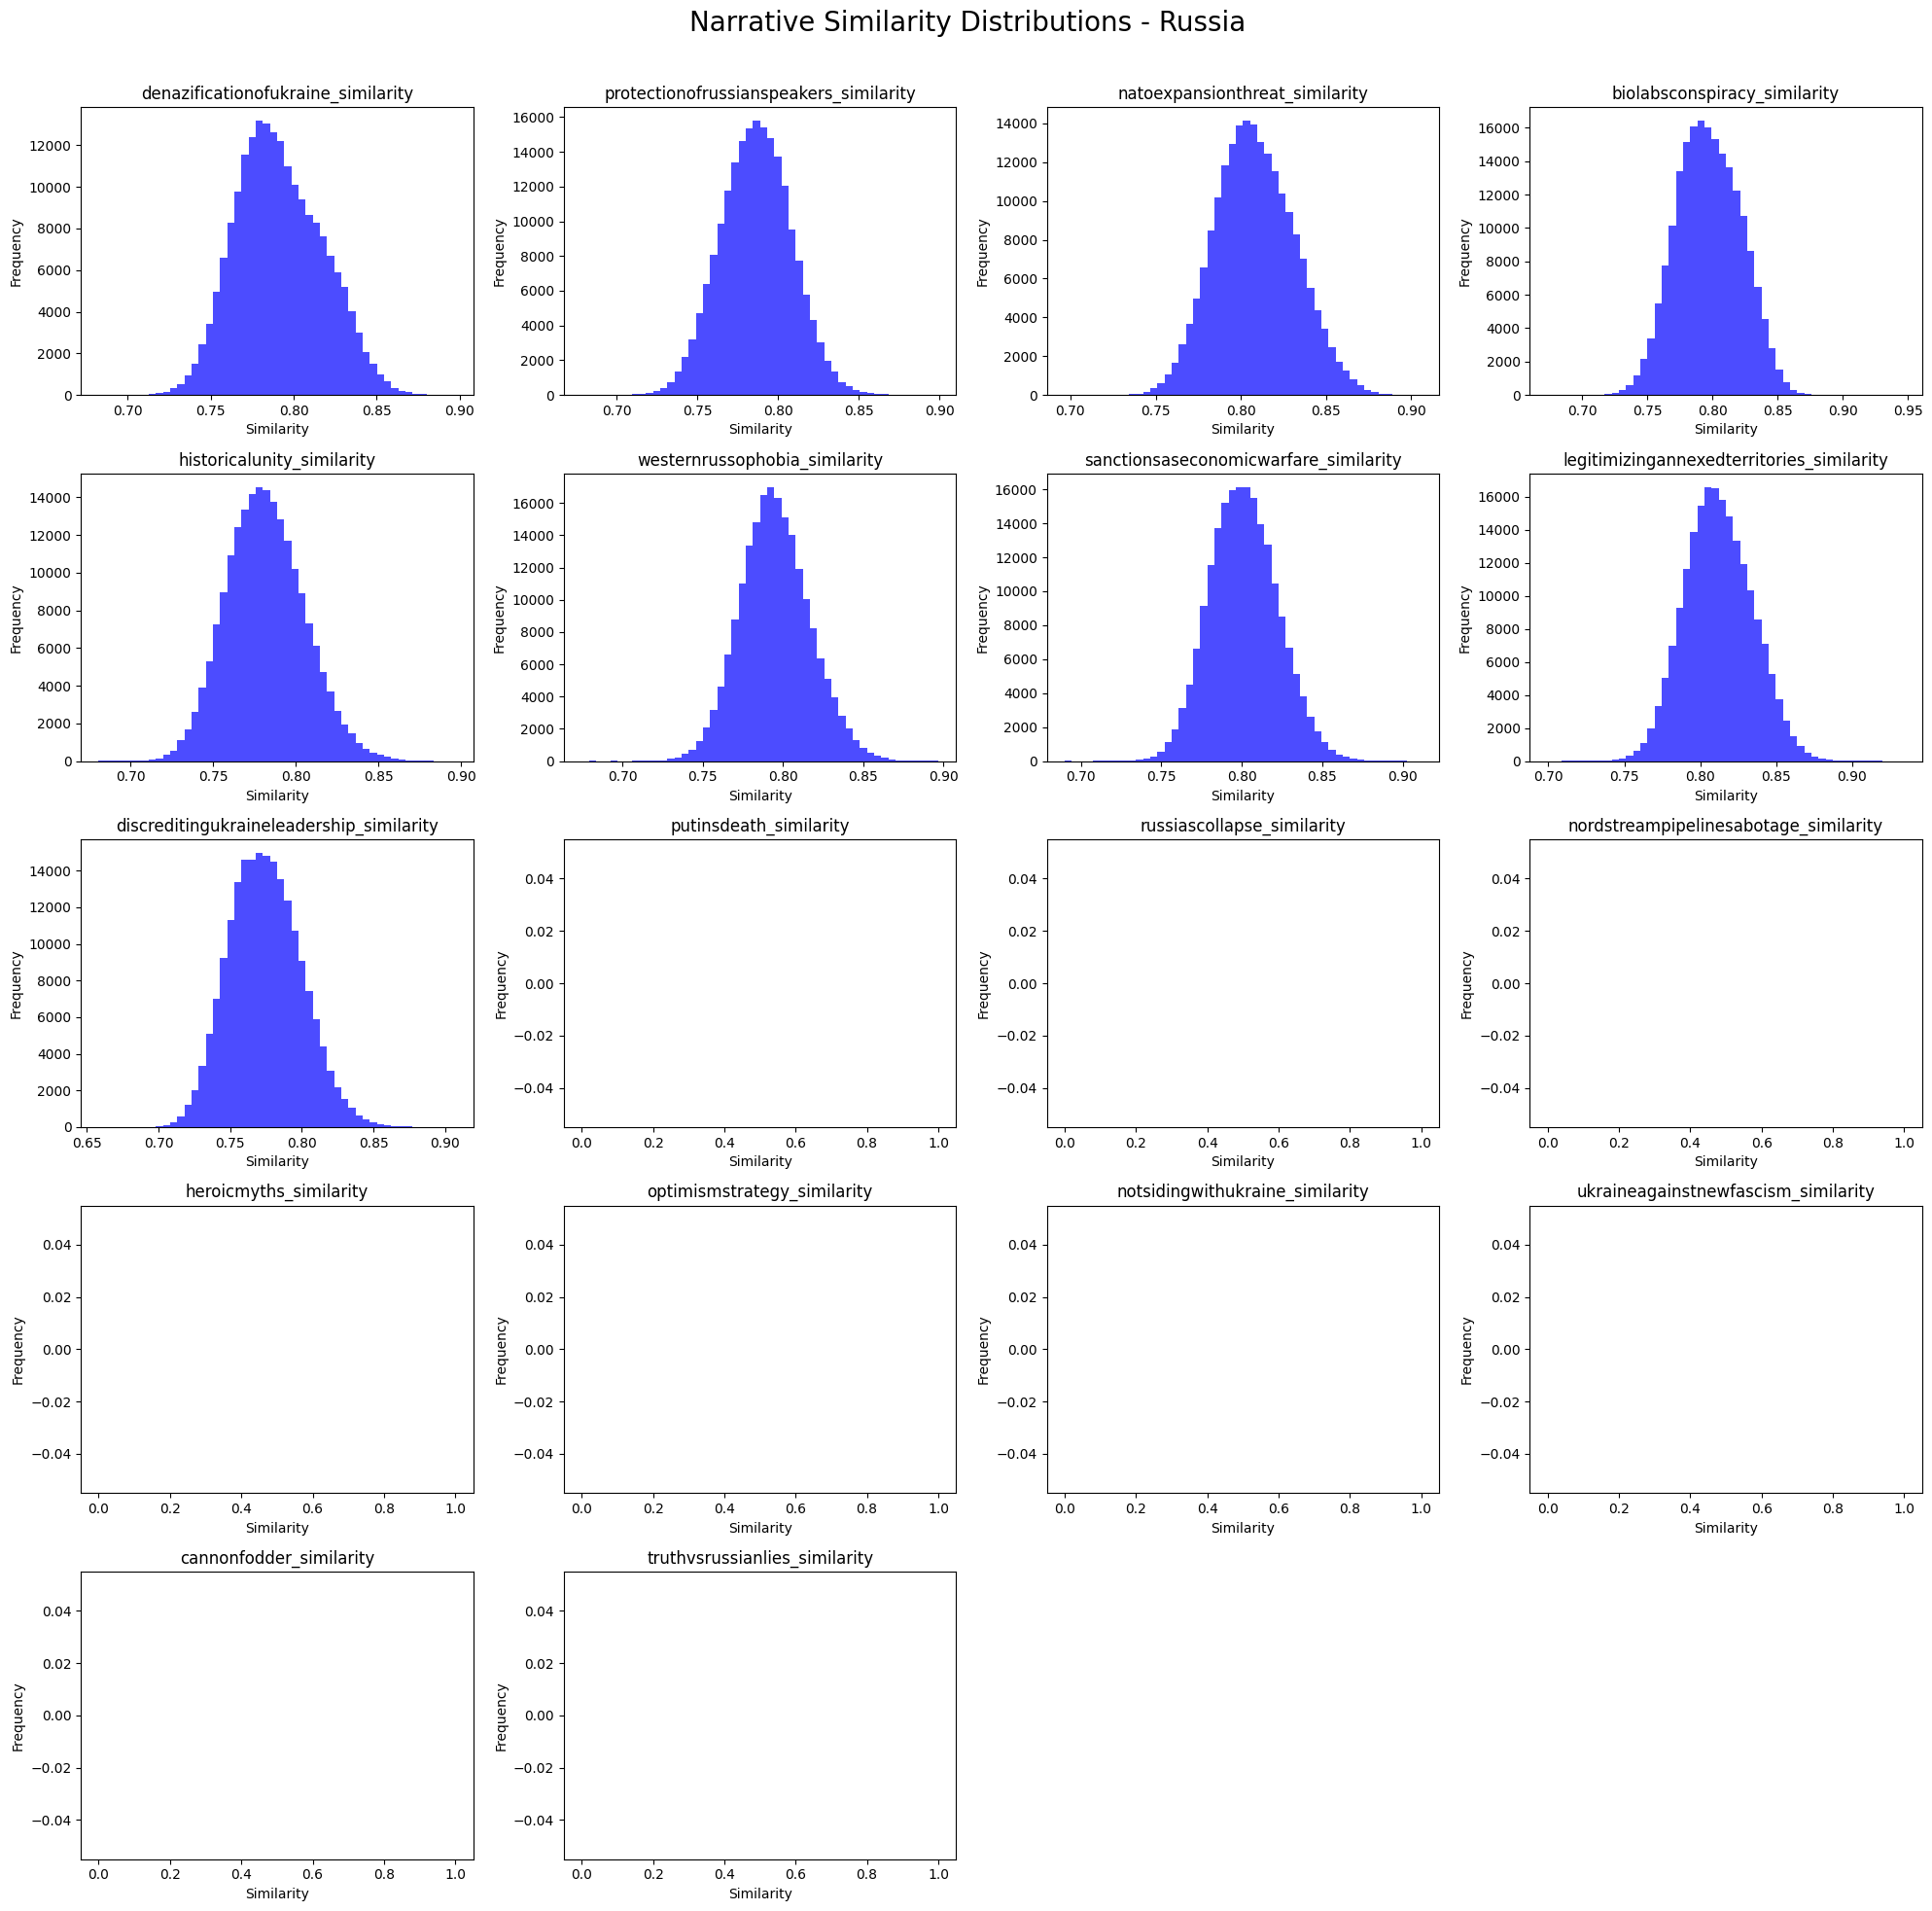

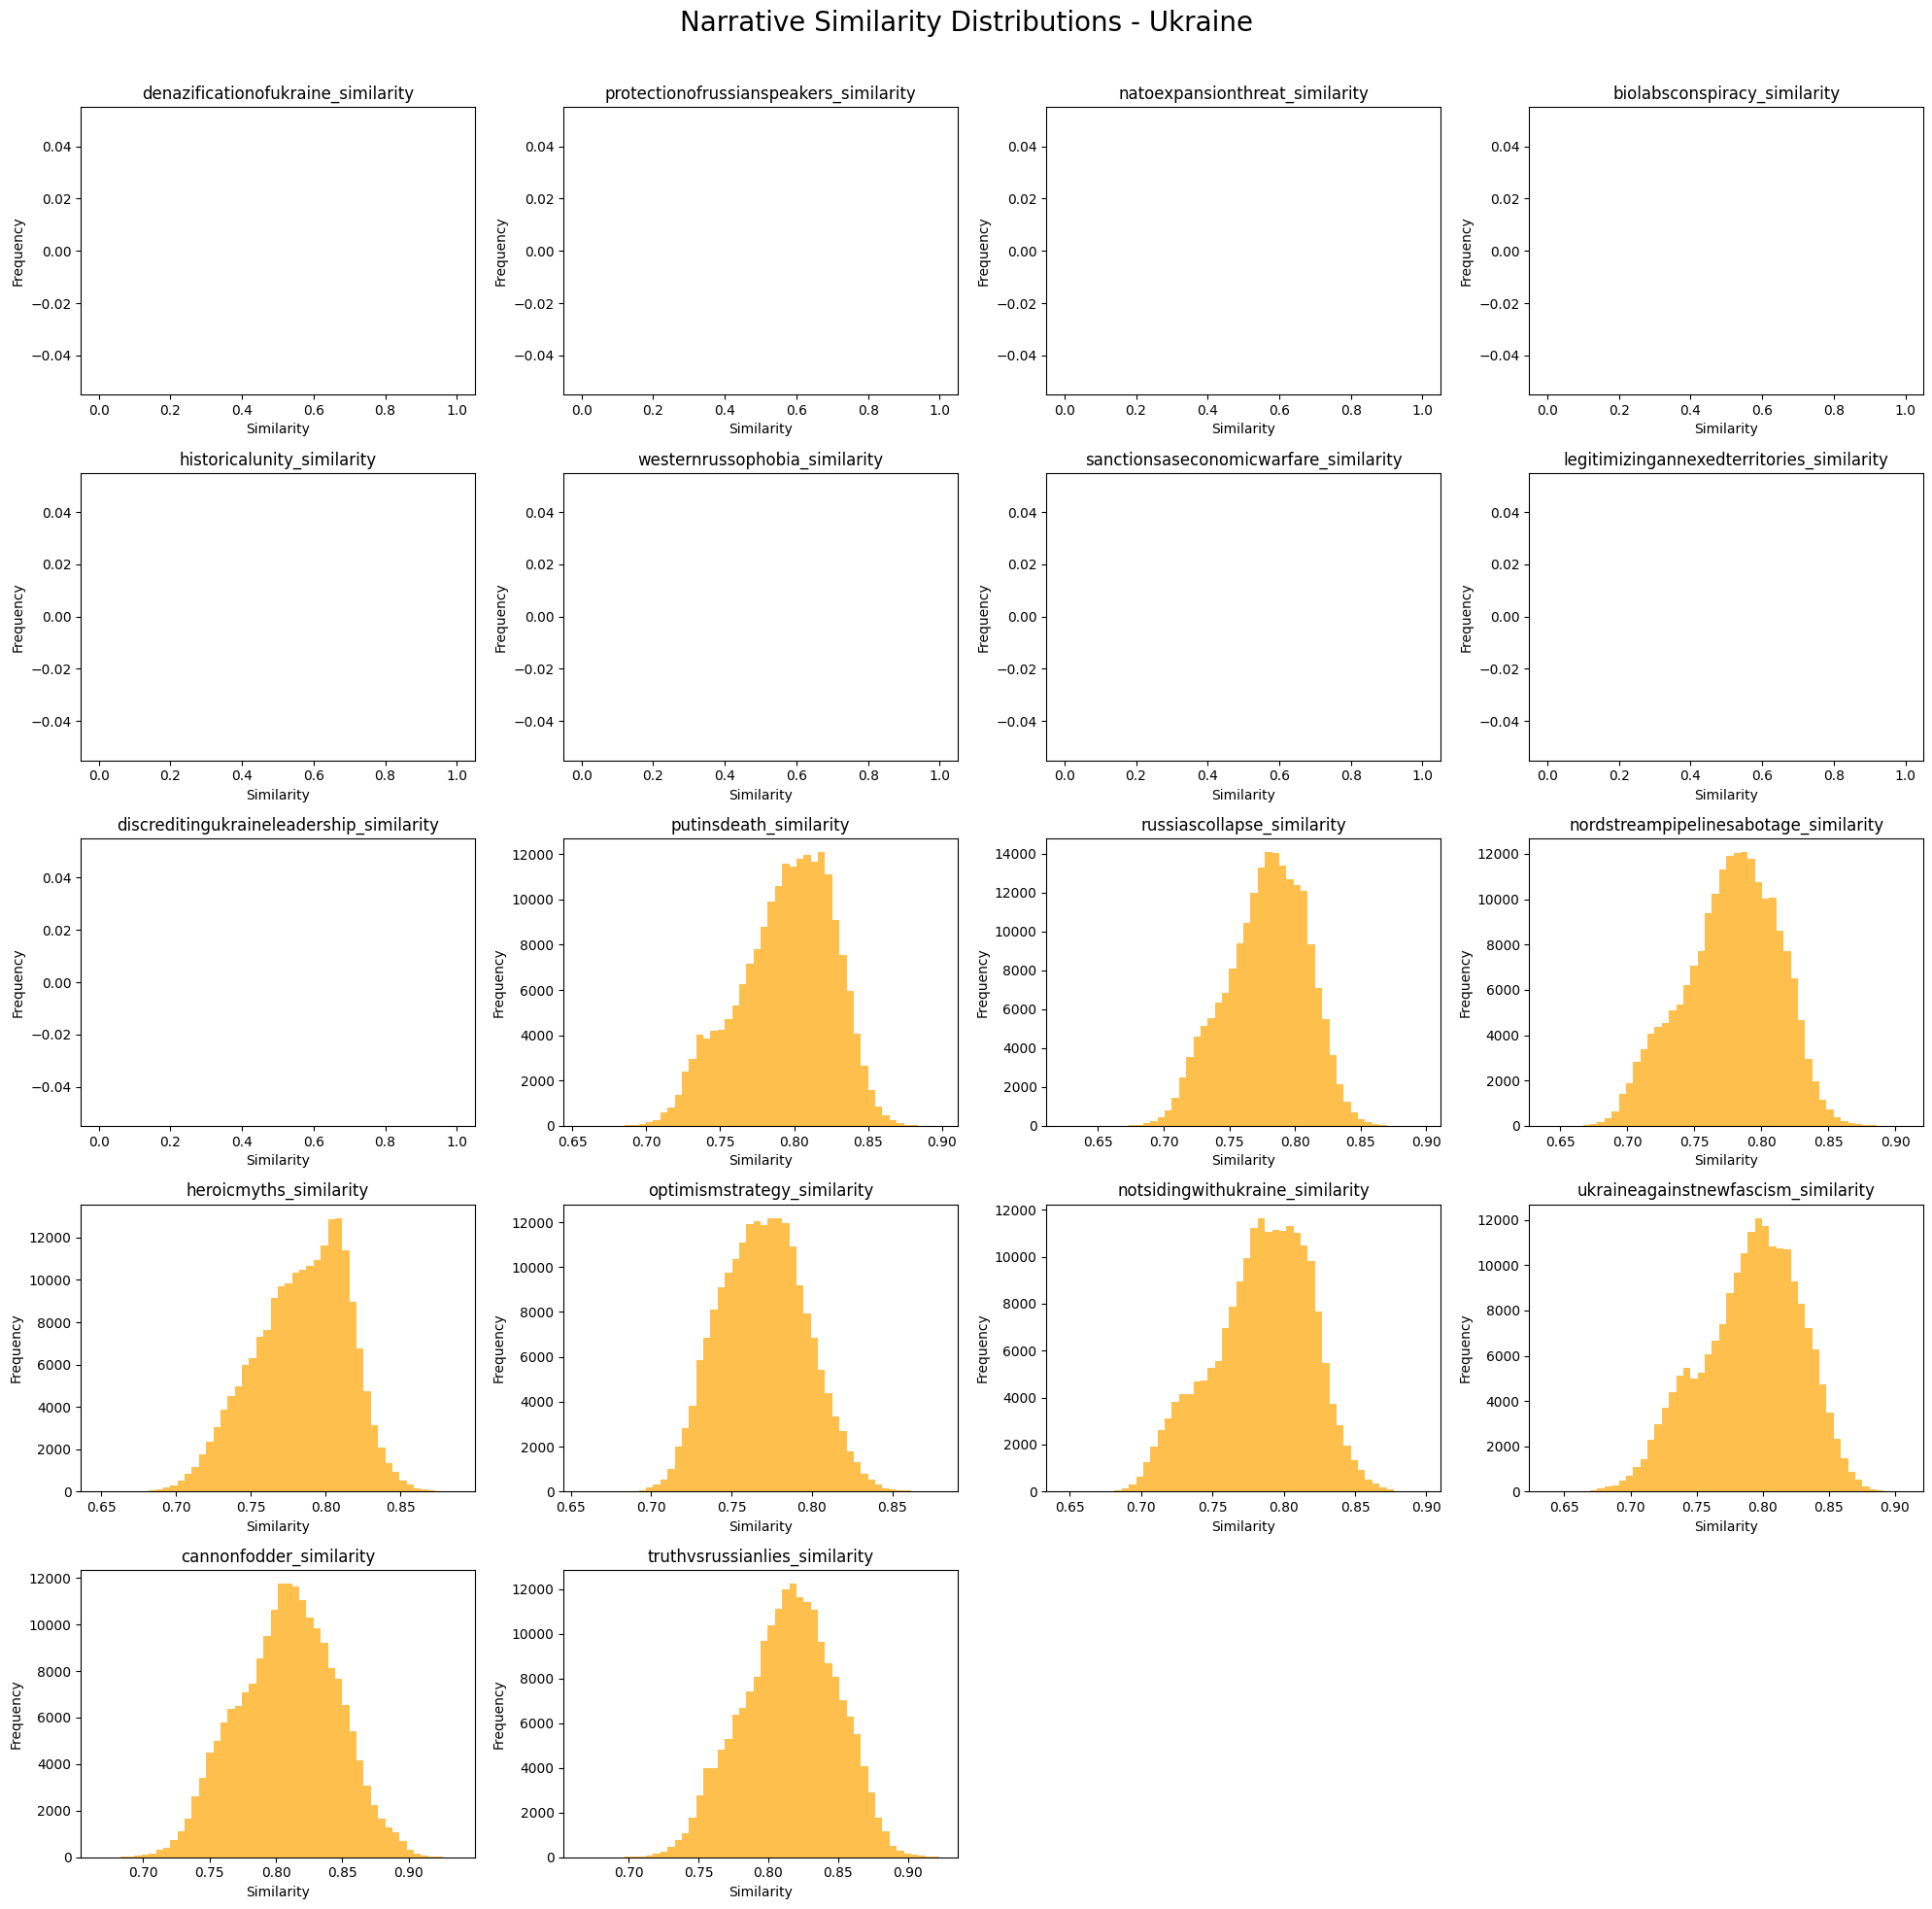

In [ ]:
import matplotlib.pyplot as plt

# Get all narrative similarity columns
narrative_cols = [col for col in df.columns if col.endswith('_similarity')]

# Split by country
df_russia = df[df['country'] == 'Russia']
df_ukraine = df[df['country'] == 'Ukraine']

# Plot settings
n_cols = 4
n_rows = (len(narrative_cols) + n_cols - 1) // n_cols

# Russia plot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()
for i, col in enumerate(narrative_cols):
    axes[i].hist(df_russia[col].dropna(), bins=50, alpha=0.7, color='blue')
    axes[i].set_title(col)
    axes[i].set_xlabel('Similarity')
    axes[i].set_ylabel('Frequency')
for j in range(i+1, len(axes)):
    axes[j].axis('off')
fig.suptitle('Narrative Similarity Distributions - Russia', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# Ukraine plot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()
for i, col in enumerate(narrative_cols):
    axes[i].hist(df_ukraine[col].dropna(), bins=50, alpha=0.7, color='orange')
    axes[i].set_title(col)
    axes[i].set_xlabel('Similarity')
    axes[i].set_ylabel('Frequency')
for j in range(i+1, len(axes)):
    axes[j].axis('off')
fig.suptitle('Narrative Similarity Distributions - Ukraine', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [ ]:
narrative_cols = [col for col in df.columns if col.endswith('_similarity')]

for narrative_col in narrative_cols:
    # Filter for messages with similarity > 0.9
    relevant = df[df[narrative_col] > 0.85].copy()
    relevant_sorted = relevant.sort_values(by=narrative_col, ascending=False)
    
    print(f"\n=== {narrative_col} ===")
    print(f"Messages with similarity > 0.9: {len(relevant_sorted)}")
    
    # Top 5
    print("\nTop 5 relevant messages:")
    for _, row in relevant_sorted.head(5).iterrows():
        print(f"Score: {row[narrative_col]:.4f} | Country: {row['country']} | Type: {row['type']} | Table: {row['table']}")
        print(f"Chat: {row.get('chat_name', 'N/A')}")
        print(f"Message: {row.get('messagetext', '')}\n{'-'*40}")
    
    # Bottom 5
    print("\nBottom 5 relevant messages:")
    for _, row in relevant_sorted.tail(5).iterrows():
        print(f"Score: {row[narrative_col]:.4f} | Country: {row['country']} | Type: {row['type']} | Table: {row['table']}")
        print(f"Chat: {row.get('chat_name', 'N/A')}")
        print(f"Message: {row.get('messagetext', '')}\n{'-'*40}")


=== denazificationofukraine_similarity ===
Messages with similarity > 0.9: 0

Top 5 relevant messages:

Bottom 5 relevant messages:

=== protectionofrussianspeakers_similarity ===
Messages with similarity > 0.9: 0

Top 5 relevant messages:

Bottom 5 relevant messages:

=== natoexpansionthreat_similarity ===
Messages with similarity > 0.9: 3

Top 5 relevant messages:
Score: 0.9059 | Country: Russia | Type: group | Table: russian_groups_messages
Chat: https://t.me/nash_lugansk
Message: НАТО всегда стремилось подобраться к самим границам России. И в ход шли любые средства. К сожалению, одним из таких средств достижения цели стала и Украина. Запад и США сделали всё, чтобы вовлечь украинцев в свою игру и получить возможность разместить своё вооружение прямо у нас под боком, прекрасно понимая, что Россия не станет такого терпеть. Как и ни одно другое государство бы не стало этого терпеть, потому что чужие ракеты на границе - это прямая угроза безопасности.
----------------------------------

In [ ]:
texts = df['messagetext'].astype(str).tolist()

# Model names
MODEL_NAMES = [
    # "deepvk/USER-bge-m3",
    "intfloat/multilingual-e5-large-instruct"
]

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {DEVICE}")
batch_size = 16

def compute_embeddings(texts, model_name):
    print(f"Computing embeddings with {model_name}")
    model = SentenceTransformer(model_name, device=DEVICE)
    return model.encode(texts, batch_size=batch_size, show_progress_bar=True)

# Compute embeddings for both models
# embeddings_bge_m3 = compute_embeddings(texts, MODEL_NAMES[0])
embeddings_e5 = compute_embeddings(texts, MODEL_NAMES[0])

# Optionally, add to DataFrame for later use
# df['embedding_bge_m3'] = list(embeddings_bge_m3)
df['embedding_e5'] = list(embeddings_e5)

# Show the DataFrame with embeddings
df.head()

Using device: cuda
Computing embeddings with intfloat/multilingual-e5-large-instruct


Batches:   0%|          | 0/625 [00:00<?, ?it/s]

,id,messagetext,chat_id,chat_name,table,embedding_e5
0,258227,Подготовка визита премьер-министра Индии в Рос...,1050820672,https://t.me/tass_agency,russian_channels_messages,"[0.014172985, 0.0043434715, -0.011479417, -0.0..."
1,67015,❗️Совместный российско-азербайджанский патруль...,1260622817,https://t.me/readovkanews,russian_channels_messages,"[0.0194318, 0.018181017, -0.014406425, -0.0460..."
2,117104,"⚡️Литва, Латвия, Эстония и Польша попросили Me...",1394050290,https://t.me/bbbreaking,russian_channels_messages,"[0.015960189, 0.012944568, -0.0068293777, -0.0..."
3,12785,Наши рыбаки сегодня словили крутой кадр ✈️,1283524369,https://t.me/zhest_belgorod,russian_channels_messages,"[0.0050023296, 0.027736673, -0.011438828, -0.0..."
4,41597,Российские войска отвели с Харьковского направ...,1260622817,https://t.me/readovkanews,russian_channels_messages,"[0.03794567, 0.010649348, 0.00024101515, -0.03..."


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import json
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer
import torch

# Load Russian narratives
DESCRIPTIONS_FILE_RU = '../../../apollolytics-network/data/propaganda_narratives/narratives_ru.json'
with open(DESCRIPTIONS_FILE_RU, 'r', encoding='utf-8') as f:
    descriptions_ru = json.load(f)
narrative_keys_ru = list(descriptions_ru.keys())
narrative_texts_ru = [desc['ru'] for desc in descriptions_ru.values()]

# Load Ukrainian narratives
DESCRIPTIONS_FILE_UK = '../../../apollolytics-network/data/propaganda_narratives/narratives_uk.json'
with open(DESCRIPTIONS_FILE_UK, 'r', encoding='utf-8') as f:
    descriptions_uk = json.load(f)
narrative_keys_uk = list(descriptions_uk.keys())
narrative_texts_uk = [desc['uk'] for desc in descriptions_uk.values()]

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# # Process BGE-M3 model
# model_bge_m3 = SentenceTransformer("deepvk/USER-bge-m3", device=DEVICE)

# # Russian narratives
# narrative_embeddings_bge_m3_ru = model_bge_m3.encode(narrative_texts_ru)
# similarities_bge_m3_ru = cosine_similarity(np.vstack(df['embedding_bge_m3']), narrative_embeddings_bge_m3_ru)
# sim_df_bge_m3_ru = pd.DataFrame(similarities_bge_m3_ru, columns=[f"{k}_sim_bge_m3_ru" for k in narrative_keys_ru])

# # Ukrainian narratives
# narrative_embeddings_bge_m3_uk = model_bge_m3.encode(narrative_texts_uk)
# similarities_bge_m3_uk = cosine_similarity(np.vstack(df['embedding_bge_m3']), narrative_embeddings_bge_m3_uk)
# sim_df_bge_m3_uk = pd.DataFrame(similarities_bge_m3_uk, columns=[f"{k}_sim_bge_m3_uk" for k in narrative_keys_uk])

# del model_bge_m3

# Process E5 model
model_e5 = SentenceTransformer("intfloat/multilingual-e5-large-instruct", device=DEVICE)

# Russian narratives
narrative_embeddings_e5_ru = model_e5.encode(narrative_texts_ru)
similarities_e5_ru = cosine_similarity(np.vstack(df['embedding_e5']), narrative_embeddings_e5_ru)
sim_df_e5_ru = pd.DataFrame(similarities_e5_ru, columns=[f"{k}_sim_e5_ru" for k in narrative_keys_ru])

# Ukrainian narratives
narrative_embeddings_e5_uk = model_e5.encode(narrative_texts_uk)
similarities_e5_uk = cosine_similarity(np.vstack(df['embedding_e5']), narrative_embeddings_e5_uk)
sim_df_e5_uk = pd.DataFrame(similarities_e5_uk, columns=[f"{k}_sim_e5_uk" for k in narrative_keys_uk])

del model_e5

# Combine all results
df = pd.concat([df, sim_df_e5_ru, sim_df_e5_uk], axis=1)

In [ ]:
import os
import json
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import torch
from dotenv import load_dotenv

# --- ENVIRONMENT ---
load_dotenv()

POSTGRES_HOST = os.getenv("POSTGRES_HOST", "localhost")
POSTGRES_PORT = os.getenv("POSTGRES_PORT", "5432")
POSTGRES_DB = os.getenv("POSTGRES_DB", "telegram_scraper")
POSTGRES_USER = os.getenv("POSTGRES_USER", "postgres")
POSTGRES_PASSWORD = os.getenv("POSTGRES_PASSWORD", "")

# --- Load test_100k table ---
engine = create_engine(
    f"postgresql://{POSTGRES_USER}:{POSTGRES_PASSWORD}@{POSTGRES_HOST}:{POSTGRES_PORT}/{POSTGRES_DB}"
)
df = pd.read_sql("SELECT * FROM test_100k", engine)

# Parse embeddings from JSONB to numpy arrays
def parse_embedding(x):
    if isinstance(x, str):
        return np.array(json.loads(x), dtype=np.float16)
    elif isinstance(x, list):
        return np.array(x, dtype=np.float16)
    else:
        return np.zeros(1024, dtype=np.float16)  # fallback, adjust if your embedding size is different

# embeddings = np.vstack(df['multilingual_e5_large_instruct'].apply(parse_embedding).values)

# # --- Load narratives ---
# DESCRIPTIONS_FILE_RU = '../../../apollolytics-network/data/propaganda_narratives/narratives_ru.json'
# DESCRIPTIONS_FILE_UK = '../../../apollolytics-network/data/propaganda_narratives/narratives_uk.json'

# with open(DESCRIPTIONS_FILE_RU, 'r', encoding='utf-8') as f:
#     descriptions_ru = json.load(f)
# narrative_keys_ru = list(descriptions_ru.keys())
# narrative_texts_ru = [desc['ru'] for desc in descriptions_ru.values()]

# with open(DESCRIPTIONS_FILE_UK, 'r', encoding='utf-8') as f:
#     descriptions_uk = json.load(f)
# narrative_keys_uk = list(descriptions_uk.keys())
# narrative_texts_uk = [desc['uk'] for desc in descriptions_uk.values()]

# # --- Load model and compute narrative embeddings in half precision ---
# DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
# model = SentenceTransformer("intfloat/multilingual-e5-large-instruct", device=DEVICE)
# if DEVICE == "cuda":
#     model.half()

# with torch.cuda.amp.autocast(enabled=(DEVICE == "cuda")):
#     narrative_embeddings_ru = model.encode(narrative_texts_ru, convert_to_numpy=True)
#     narrative_embeddings_uk = model.encode(narrative_texts_uk, convert_to_numpy=True)

# # Ensure narrative embeddings are float16
# narrative_embeddings_ru = narrative_embeddings_ru.astype(np.float16)
# narrative_embeddings_uk = narrative_embeddings_uk.astype(np.float16)

# # --- Compute similarities ---
# similarities_ru = cosine_similarity(embeddings, narrative_embeddings_ru)
# similarities_uk = cosine_similarity(embeddings, narrative_embeddings_uk)

# # --- Create DataFrames for similarity scores ---
# sim_df_ru = pd.DataFrame(similarities_ru, columns=[f"{k}_sim_e5_ru" for k in narrative_keys_ru])
# sim_df_uk = pd.DataFrame(similarities_uk, columns=[f"{k}_sim_e5_uk" for k in narrative_keys_uk])

# # --- Concatenate with original DataFrame ---
# df = pd.concat([df, sim_df_ru, sim_df_uk], axis=1)

# # Show the result
# df.head()

In [ ]:
df

,chat_id,id,chat_name,peer_id,messagedatetime,messagedate,messagetext,out,mentioned,media_unread,...,ttl_period,quick_reply_shortcut_id,effect,factcheck,views,forwards,replies,reactions,embedding,multilingual_e5_large_instruct
0,2022231015,4495,https://t.me/mediyca,2022231015,2025-01-30 17:45:31,2025-01-30,"В импортных чипсах Lay’s обнаружили аллергены,...",False,False,False,...,None,None,None,None,195840,315,0,"{'❤': 100, '🌭': 5, '👍': 68, '👎': 14, '🔥': 7, '...",None,"[0.01567930541932583, -0.0037688673473894596, ..."
1,1197865170,26788,https://t.me/ssigny,1197865170,2022-06-06 17:14:41,2022-06-06,"⚡️В ЛНР не исключили обращение к ОДКБ, но толь...",False,False,False,...,None,None,None,None,97405,31,0,"{'❤': 17, '👍': 1076, '👎': 20, '😁': 5, '🤔': 52}",None,"[-0.004293631762266159, 0.010973948985338211, ..."
2,1498939244,37134,https://t.me/voenacher,1498939244,2023-01-04 04:54:00,2023-01-04,"«Все награды, они почетные, они боевые. Каждая...",False,False,False,...,None,None,None,None,287178,51,0,"{'❤': 267, '🌚': 5, '👍': 2988, '👎': 13, '👏': 12...",None,"[-0.0009024208411574364, -0.002367566805332899..."
3,1117628569,37134,https://t.me/mash,1117628569,2022-08-04 10:14:27,2022-08-04,"На ""президентской"" дороге Севастополя фура про...",False,False,False,...,None,None,None,None,557730,1302,0,None,None,"[-0.0009024208411574364, -0.002367566805332899..."
4,1708761316,68470,https://t.me/novosti_efir,1708761316,2025-04-07 19:54:24,2025-04-07,Мошенники массово обманывают россиян через фей...,False,False,False,...,None,None,None,None,779230,1881,0,"{'❤': 85, '👍': 327, '👎': 35, '🔥': 29, '😁': 130...",None,"[-0.0103005301207304, 0.014275731518864632, -0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1635619800,1059320,https://t.me/mostodaychat,1635619800,2024-07-20 09:47:28,2024-07-20,"Нет. Патриоты там сидеть не могут, или они не ...",False,False,False,...,None,None,None,None,0,0,0,None,None,"[0.01544005237519741, -0.013247917406260967, -..."
99996,1473047870,159692,https://t.me/gruppa_ekb_eburg,1473047870,2024-05-30 04:45:28,2024-05-30,Продавец-консультант сувенирной продукции.\nОт...,False,False,False,...,None,None,None,None,0,0,0,{'👍': 1},None,"[-0.009056540206074715, 0.013310451991856098, ..."
99997,1473047870,163737,https://t.me/gruppa_ekb_eburg,1473047870,2024-06-16 05:28:37,2024-06-16,В бригаде строителей русских требуются 1 напар...,False,False,False,...,None,None,None,None,0,0,0,{'👍': 1},None,"[0.021832171827554703, 0.03789491951465607, -0..."
99998,1635619800,1096355,https://t.me/mostodaychat,1635619800,2024-08-02 19:23:59,2024-08-02,А где логика? Там что другие дети? Они чем то ...,False,False,False,...,None,None,None,None,0,0,0,"{'🎉': 2, '💯': 1, '🔥': 5}",None,"[0.0036467830650508404, 0.00692920433357358, -..."


In [ ]:
# Choose your narrative similarity column, e.g.:
narrative_col = "HistoricalUnityOfRussiaAndUkraine_sim_e5_ru"  # <-- change as needed

# Sort by similarity
sorted_df = df.sort_values(by=narrative_col, ascending=False)

print(f"\nTop 5 messages for {narrative_col}:\n")
for i, row in sorted_df.head(5).iterrows():
    print(f"Score: {row[narrative_col]:.4f}")
    print(f"Chat: {row.get('chat_name', 'N/A')}")
    print(f"Message: {row['messagetext']}\n{'-'*40}")

print(f"\nLowest 5 messages for {narrative_col}:\n")
for i, row in sorted_df.tail(5).iterrows():
    print(f"Score: {row[narrative_col]:.4f}")
    print(f"Chat: {row.get('chat_name', 'N/A')}")
    print(f"Message: {row['messagetext']}\n{'-'*40}")


Top 5 messages for HistoricalUnityOfRussiaAndUkraine_sim_e5_ru:

Score: 0.8965
Chat: https://t.me/varlamov_news
Message: Зеленский в обращении по случаю Дня украинской государственности назвал Украину «единственной законной наследницей Киевской Руси».

Украина — это «страна, с которой началась история христианства в Восточной Европе», это «не колония, не анклав, не протекторат, не губерния, эялет или кронланд, не часть чужих империй, не „земли в составе“, не союзная республика, не автономия и не провинция, а свободная, самостоятельная, суверенная, неделимая и независимая страна», сказал Зеленский.

«Княже Володимир, тогда чур не обижаться, что часть Украины будут называть Русью. Сам сказал. Молодец», — написала представитель МИД России Захарова, комментируя слова президента Украины о Киевской Руси.
----------------------------------------
Score: 0.8948
Chat: https://t.me/meduzalive
Message: «Нацистские сатанисты укрепились в святом русском городе Киеве». Как выяснила «Медуза», именно 

In [ ]:
df.columns

Index(['chat_id', 'id', 'chat_name', 'peer_id', 'messagedatetime',
       'messagedate', 'messagetext', 'out', 'mentioned', 'media_unread',
       'silent', 'post', 'from_scheduled', 'legacy', 'edit_hide', 'pinned',
       'noforwards', 'invert_media', 'offline', 'from_id',
       'from_boosts_applied', 'saved_peer_id', 'fwd_from', 'fwd_from_type',
       'via_bot_id', 'via_business_bot_id', 'reply_to', 'reply_markup',
       'entities', 'edit_date', 'post_author', 'grouped_id', 'ttl_period',
       'quick_reply_shortcut_id', 'effect', 'factcheck', 'views', 'forwards',
       'replies', 'reactions', 'embedding', 'multilingual_e5_large_instruct',
       'DenazificationOfUkraine_sim_e5_ru',
       'ProtectionOfRussianSpeakers_sim_e5_ru',
       'NATOExpansionThreat_sim_e5_ru', 'BiolabsConspiracy_sim_e5_ru',
       'UkraineasaFailedState_sim_e5_ru',
       'HistoricalUnityOfRussiaAndUkraine_sim_e5_ru',
       'WesternRussophobia_sim_e5_ru', 'SanctionsAsEconomicWarfare_sim_e5_ru',
       '